# Tree basics

The top of the tree contains all available training observations: the root node. 
We partition the data into homogeneous non-overlapping subgroups: the nodes.
We create subgroups via simple yes-no questions.

A tree then predicts the output in a leaf node as follows:
* average of the response for regression
* majority voting for classification

CART uses binary recursive partitioning to split the data in subgroups. In each node, we search for the best feature to partition the data into two regions: R1 and R2 (hence, binary).

Minimize the overall loss between observed responses and leaf node prediction:
* overall loss = loss in region R1 + loss in region R2
* for regression: mean squared or absolute error, deviance,...
* for classification: cross-entropy, Gini index,...

After splitting the data, this process is repeated for region R1 and R2 separately (hence, recursive).
Repeat until stopping criterion is satisfied, e.g., maximum depth of a tree or minimum loss improvement.

# 2. Toy example of a regression tree

Sklearn python library contains a dedicated "tree" [class](https://scikit-learn.org/stable/modules/tree.html) to implement decision trees:
* ```DecisionTreeClassifier``` is a class capable of performing multi-class classification on a dataset
* ```DecisionTreeRegressor``` class is applied to regression problems

In case of regression trees, some of the main parameters of the fitting function are described:
```
class sklearn.tree.DecisionTreeRegressor(*, 
                criterion='squared_error', 
                splitter='best', 
                max_depth=None, 
                min_samples_split=2, 
                min_samples_leaf=1, 
                ccp_alpha=0.0,
                ...)
```
* **criterion:** a string specifying which loss function to use (e.g. 'squared_error', 'mse', 'friedman_mse', etc.) - default = 'squared_error'
* **splitter:** The strategy used to choose the split at each node
* **max_depth:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leave contain less than min_samples_split samples
* **min_samples_split:** The minimum number of samples required to split an internal node
* **min_samples_leaf:** The minimum number of samples required to be at a leaf node
* **ccp_alpha:** Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen

In [89]:
# import libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [114]:
# generate synthetic data
x = np.linspace(start=0, stop=2 * np.pi, num=500)
m = 2 * np.sin(x)
y = m + np.random.normal(loc = 0, scale = 1, size = len(x))

In [115]:
print(f'data-type x: {type(x)}, data-type y: {type(y)}')

data-type x: <class 'numpy.ndarray'>, data-type y: <class 'numpy.ndarray'>


Managing column names comes much easier when the data-type is pd.DataFrame. Therefore, we transfrom x and y and we assign a specific column name:

In [116]:
# adding column name to array (and transforming it into pd.DataFrame)
x = pd.DataFrame({'feature_1':x})
y = pd.DataFrame({'y':y})

In [117]:
print(f'data-type x: {type(x)}, data-type y: {type(y)}')

data-type x: <class 'pandas.core.frame.DataFrame'>, data-type y: <class 'pandas.core.frame.DataFrame'>


In [118]:
# fitting regression tree and predict over train set
clf_depth_1 = tree.DecisionTreeRegressor(max_depth = 1).fit(x, y)
y_1 = clf_depth_1.predict(x)

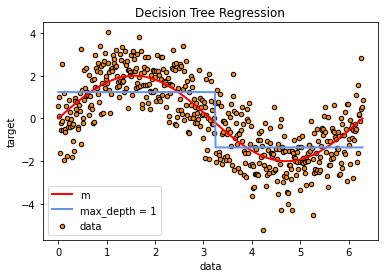

In [119]:
# Plot clf_depth_1
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x, m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x, y_1, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [120]:
# fitting regression tree and predict over train set
clf_depth_3 = tree.DecisionTreeRegressor(max_depth = 3).fit(x, y)
y_2 = clf_depth_3.predict(x)

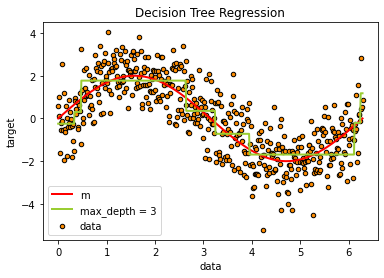

In [121]:
# Plot clf_depth_3
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x, m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x, y_2, color="yellowgreen", label="max_depth = 3", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

It can be noticed that setting hyperparameter depth = 3 overfits the data.

### 2.1 Visualizing a regression tree

There are a few ways to visualize a decision tree in Python:

* print text representation of the tree with sklearn.tree.export_text method
* plot with sklearn.tree.plot_tree method (matplotlib needed)
* plot with sklearn.tree.export_graphviz method (graphviz needed)

##### 2.1.1 sklearn.tree.export_text method

It is possible to provide a text representation of the decision tree structure. Useful in case we want to generate a log file about the model into the text file.

In [122]:
# import relevant libraries
from io import StringIO
from sklearn.tree import export_graphviz

In [123]:
# plotting clf_depth_1
text_representation = tree.export_text(clf_depth_1)
print(text_representation)

|--- feature_0 <= 3.24
|   |--- value: [1.23]
|--- feature_0 >  3.24
|   |--- value: [-1.36]



##### 2.1.2 sklearn.tree.plot_tree method

In [124]:
col_names_x = x.columns
col_name_y = y.columns

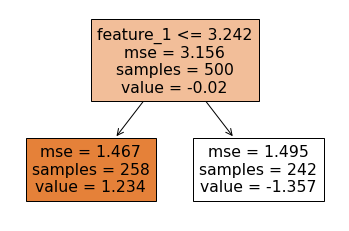

In [125]:
#fig = plt.figure(figsize = (15,15))
_ = tree.plot_tree(clf_depth_1, 
                   feature_names = col_names_x,  
                   class_names = col_name_y,
                   filled = True)

##### 2.1.3 sklearn.tree.export_graphviz method

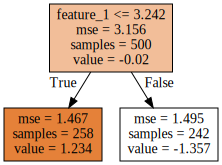

In [126]:
# import relevant library
import graphviz

dot_data = tree.export_graphviz(clf_depth_1, out_file=None, 
                                feature_names = col_names_x,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

### 2.2 Your turn!

**Question:** choose one of the trees from the previously discussed examples and pick a leaf node, but
keep it simple for now.
1. Replicate the predictions for that leaf node, based on the split(s) and the training data.
2. Replicate the deviance measure for that leaf node, based on the split(s).

**Hint:** the deviance used in an anova {rpart} tree is the Sum of Squared Errors (SSE):

$$
\begin{align}
SSE = \sum^{n}_{i=1}{(y_{i} - \hat{f}(x_{i}))^{2}}
\end{align}
$$

In [127]:
# fitting tree with max_depth = 2
clf_depth_2 = tree.DecisionTreeRegressor(max_depth = 2).fit(x, y)
y_clf_depth_2 = clf_depth_2.predict(x)

In [128]:
# plotting clf_depth_2
text_representation = tree.export_text(clf_depth_2)
print(text_representation)

|--- feature_0 <= 3.24
|   |--- feature_0 <= 0.47
|   |   |--- value: [-0.09]
|   |--- feature_0 >  0.47
|   |   |--- value: [1.46]
|--- feature_0 >  3.24
|   |--- feature_0 <= 6.11
|   |   |--- value: [-1.45]
|   |--- feature_0 >  6.11
|   |   |--- value: [0.19]



Let's predict the values for leaf node <= 0.47:

In [155]:
# stack the x and y pd.DataFrame together
df = pd.concat([y,x], axis = 1); df.columns

Index(['y', 'feature_1'], dtype='object')

In [156]:
# filter for the desired value
df_filtered = df[df.feature_1 < 0.47]

In [166]:
# manual computation
obs = np.mean(df_filtered.y); obs

-0.08685978347323085

In [167]:
# prediction via fitted model
pred = np.mean(clf_depth_2.predict(np.array(df_filtered.feature_1).reshape(-1, 1))); pred

-0.08685978347323081

In [186]:
# calculate the deviance
dev = np.sum(pow(df_filtered.y - pred,2)); dev

34.345251908265965

### 2.3 A very deep tree!

In [196]:
deep_tree = tree.DecisionTreeRegressor(max_depth = 20,
                                      min_samples_split = 10,
                                      min_samples_leaf = 5,
                                      ccp_alpha = 0).fit(x, y)
y_deep_tree = deep_tree.predict(x)

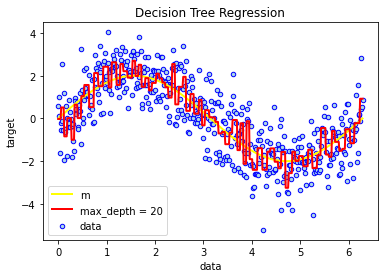

In [197]:
# Plot clf_depth_3
plt.figure()
plt.scatter(x, y, s=20, edgecolor="blue", c="lightblue", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x, m, color="yellow", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x, y_deep_tree, color="red", label="max_depth = 20", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Overfitted!

In [ ]:
test integration jupyter lab w git